In [21]:
from glob import glob
path='../'
filename='AFEP-Hyd-02.fepout'
fepoutFiles = glob(path+filename)
temperature = 300
RT = 0.00198720650096 * temperature
print(f"Will process {len(fepoutFiles)} fepout files.")

Will process 1 fepout files.


# Import necessary libraries
SAFEP_parse.py contains all the functions and library calls necessary to run the notebook
# Required libraries:
- numpy
- pandas
- matplotlib
- alchemlyb (pip install git+https://github.com/alchemistry/alchemlyb)
- natsort (for sorting file names)
- glob (for unix-like file paths)



In [22]:
from SAFEP_parse import *
plt.rcParams['figure.dpi'] = 150

# Use the Multistate Bennett Acceptance Ratio estimator

In [23]:
u_nk = namd.extract_u_nk(fepoutFiles, temperature)
bar = BAR()
bar.fit(u_nk)

BAR()

# Extract key features from the MBAR fitting

In [24]:
l, l_mid, f, df, ddf, errors = get_MBAR(bar)
#print(df.cumsum() * RT) #in unit of KT
print("Overall free energy",df.cumsum() * RT) #in unit of kcal/mol

print("Errors", errors)

Overall free energy [0.49173618 1.00718467 1.57007936 2.17965705 2.86627131 3.66710372
 4.5524496  5.31235536 5.77537339 5.89916675 5.82471492 5.74707327
 5.64294788 5.49187488 5.28192594 4.99377823 4.63999023 4.31678081
 4.1570912  4.22182444]
Errors [0.         0.05206786 0.07989019 0.09940862 0.11575719 0.12925338
 0.14017987 0.15060325 0.16076514 0.17029554 0.17888793 0.18309269
 0.18726266 0.19144899 0.19591237 0.20066866 0.2059662  0.2113252
 0.21546732 0.21754345 0.21803461]


In [25]:
#Overall delta G_site
print(f'\u0394G*(site) = {np.round((df.cumsum()*RT)[-1], 3)}\u00B1{np.round(errors[-1], 3)} kcal/mol')

ΔG*(site) = 4.222±0.218 kcal/mol


# Plot the change in free energy based on MBAR estimates

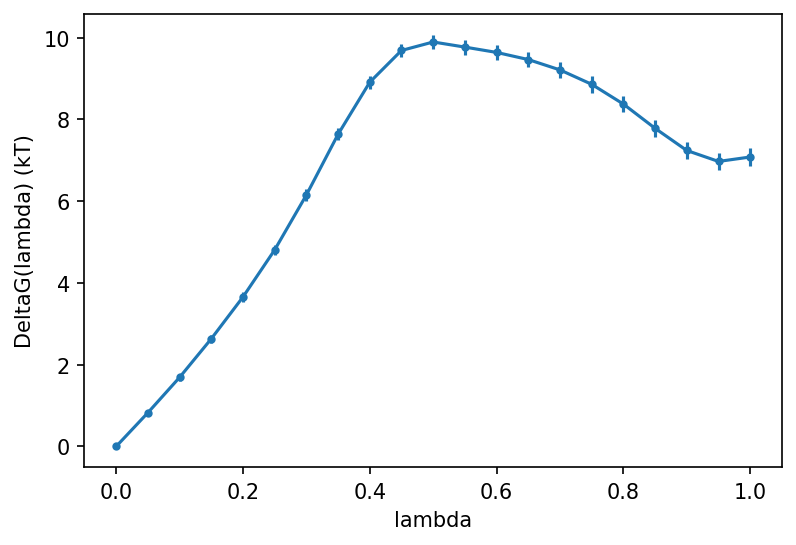

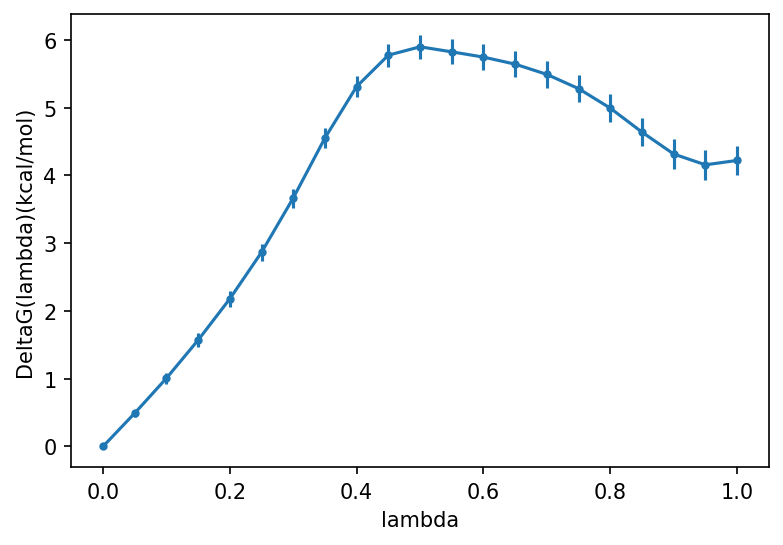

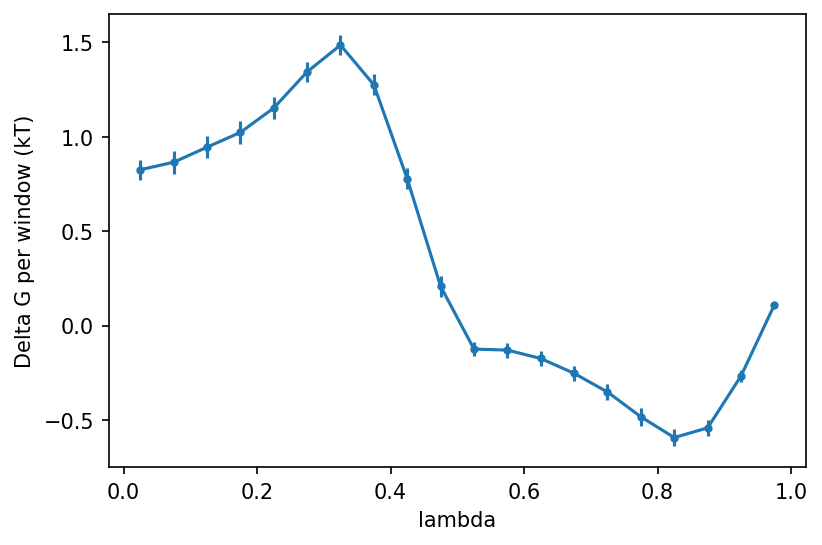

In [26]:
# Cumulative change in kT
plt.errorbar(l, f, yerr=errors, marker='.')
plt.xlabel('lambda')
plt.ylabel('DeltaG(lambda) (kT)')
plt.show()

# Cumulative change in kcal/mol
plt.errorbar(l, f * RT, yerr=errors, marker='.')
plt.xlabel('lambda')
plt.ylabel('DeltaG(lambda)(kcal/mol)')
plt.show()

# Per-window change in kT
plt.errorbar(l_mid, df, yerr=ddf, marker='.')
plt.xlabel('lambda')
plt.ylabel('Delta G per window (kT)')
plt.show()


# Plot the estimated total change in free energy as a function of simulation time; contiguous subsets starting at t=0 ("Forward") and t=end ("Reverse")

<AxesSubplot:xlabel='Fraction of the simulation time', ylabel='$\\Delta G$ (kT)'>

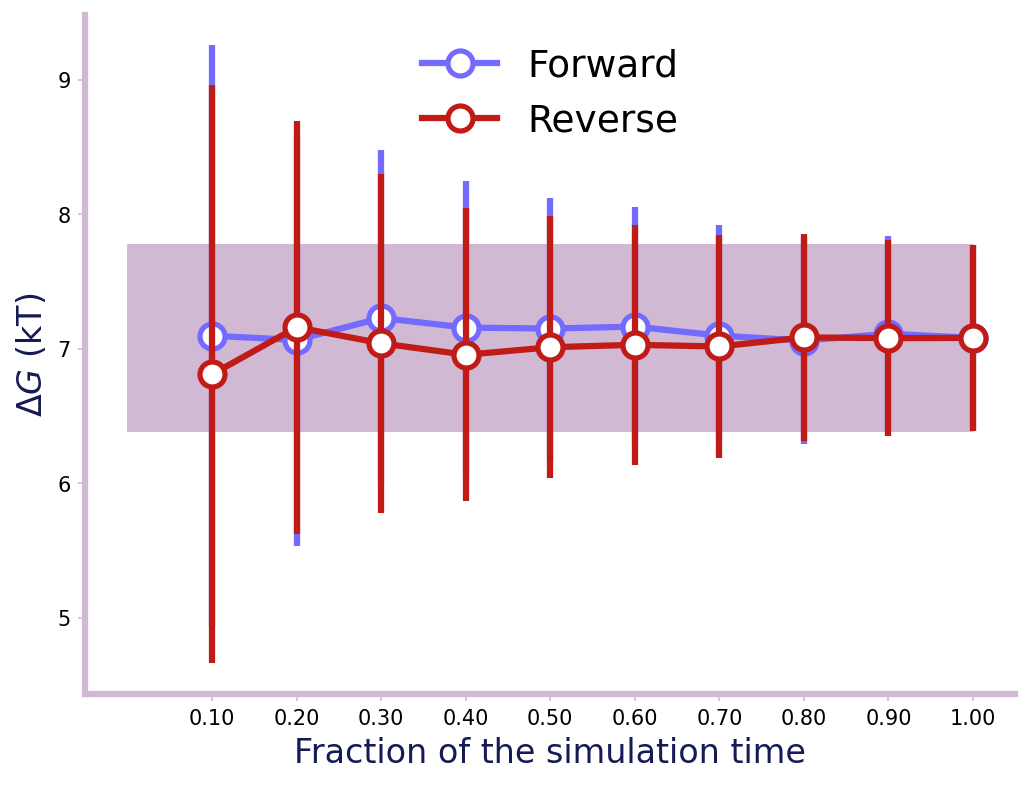

In [27]:
convergence_plot(u_nk, l)

# Use an exponential estimator to assess residual discrepancies and check for hysteresis

In [28]:
l, l_mid, dG_f, dG_b = get_EXP(u_nk)

Text(0, 0.5, 'Diff. in delta-G')

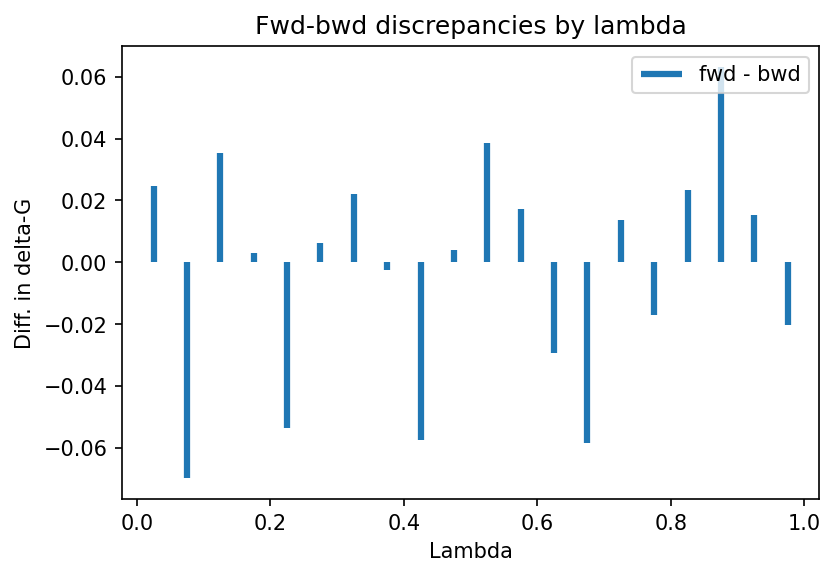

In [29]:
plt.vlines(l_mid, np.zeros(len(l_mid)), dG_f + np.array(dG_b), label="fwd - bwd", linewidth=3)

plt.legend()
plt.title('Fwd-bwd discrepancies by lambda')
plt.xlabel('Lambda')
plt.ylabel('Diff. in delta-G')

# The above data should follow a roughly normal distribution centered on 0.

Text(0, 0.5, 'Count')

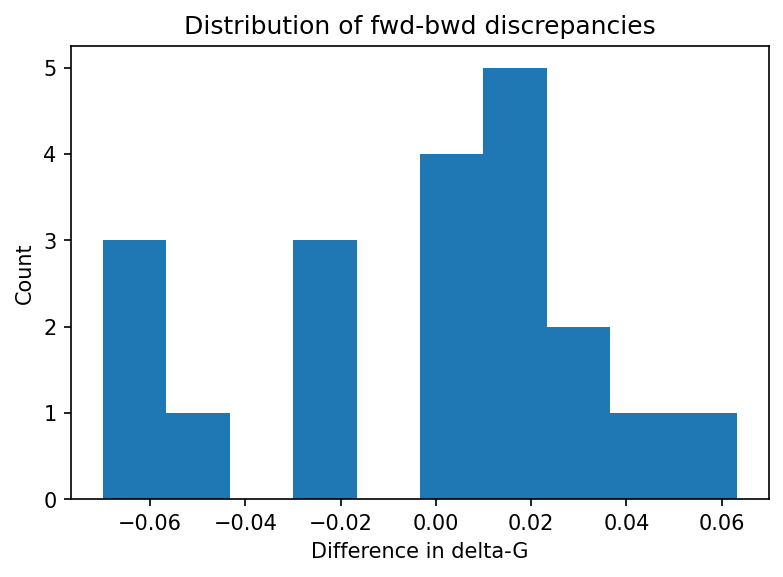

In [30]:
plt.hist(dG_f + np.array(dG_b));
plt.title('Distribution of fwd-bwd discrepancies')
plt.xlabel('Difference in delta-G')
plt.ylabel('Count')